In [24]:
import cv2
import os

# Correct image path
image_path = "imgall.jpg"
image = cv2.imread(image_path)

# Check if the image is loaded
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a directory to save the digits
output_dir = "SegmentedImage/"
os.makedirs(output_dir, exist_ok=True)

# Set a minimum size for contours to be considered digits
min_width = 20
min_height = 40

# Loop through contours to extract digits
count = 0
for contour in sorted(contours, key=lambda c: cv2.boundingRect(c)[0]):
    x, y, w, h = cv2.boundingRect(contour)
    if w > min_width and h > min_height:  # Filter out small noise
        count += 1
        digit = image[y:y+h, x:x+w]
        output_path = os.path.join(output_dir, f"digit_{count}.png")
        cv2.imwrite(output_path, digit)
        print(f"Saved: {output_path}")

print(f"Total digits saved: {count}")

Saved: SegmentedImage/digit_1.png
Saved: SegmentedImage/digit_2.png
Saved: SegmentedImage/digit_3.png
Saved: SegmentedImage/digit_4.png
Saved: SegmentedImage/digit_5.png
Saved: SegmentedImage/digit_6.png
Total digits saved: 6


Enhanced image saved at: SegmentedImage/0.png


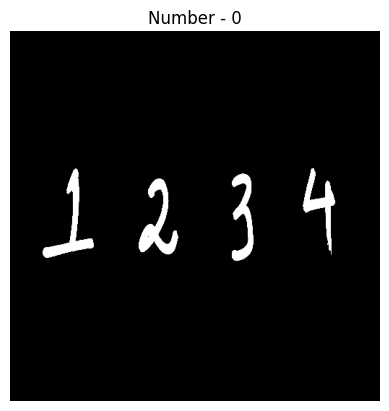

In [15]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Load the image in grayscale
image_path = 'imgall.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Image not found at path {image_path}")
else:
    # Invert the image (black background, white digits)
    inverted_image = cv2.bitwise_not(image)

    # Apply thresholding to ensure the background is black
    _, thresholded_image = cv2.threshold(inverted_image, 200, 255, cv2.THRESH_BINARY)

    # Enhance contrast and brightness: make text whiter and background darker
    alpha = 1.5  # Increase contrast
    beta = 0     # No extra brightness change (keep background black)
    enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

    # Apply dilation to make the text bolder (more prominent)
    kernel = np.ones((5, 5), np.uint8)  # Use a larger kernel to make text bolder
    dilated_image = cv2.dilate(enhanced_image, kernel, iterations=1)

    # Resize the processed image to a larger size for saving
    larger_size = (512, 512)  # New size: 512x512 pixels
    resized_image = cv2.resize(dilated_image, larger_size)

    # Create a folder if it doesn't exist
    output_folder = 'SegmentedImage/'
    os.makedirs(output_folder, exist_ok=True)

    # Save the larger edited image
    output_path = os.path.join(output_folder, '0.png')
    cv2.imwrite(output_path, resized_image)
    print(f"Enhanced image saved at: {output_path}")

    # Display the larger image using Matplotlib
    plt.imshow(resized_image, cmap='gray')
    plt.title('Number - 0')
    plt.axis('off')
    plt.show()

Enhanced image with margins saved at: Final\digit_1.png


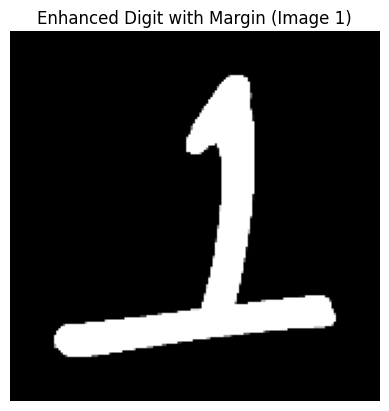

Enhanced image with margins saved at: Final\digit_2.png


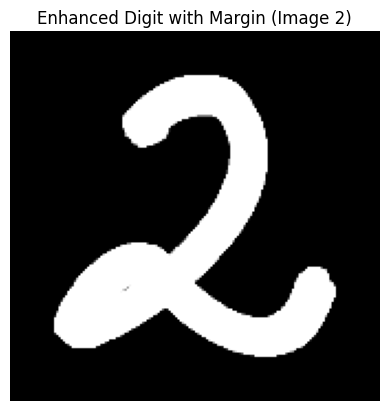

Enhanced image with margins saved at: Final\digit_3.png


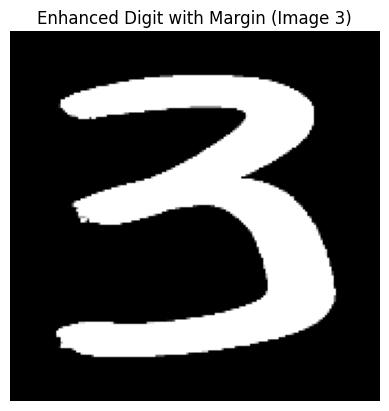

Enhanced image with margins saved at: Final\digit_4.png


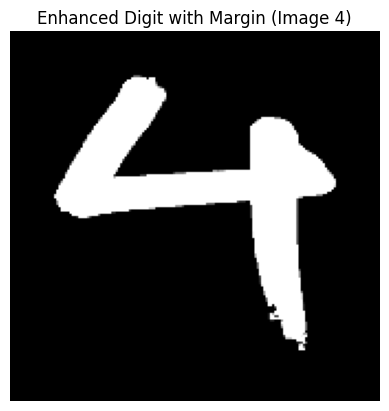

Enhanced image with margins saved at: Final\digit_5.png


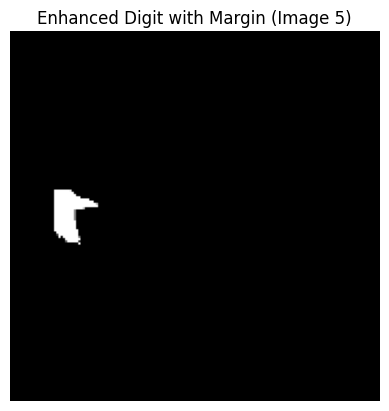

Enhanced image with margins saved at: Final\digit_6.png


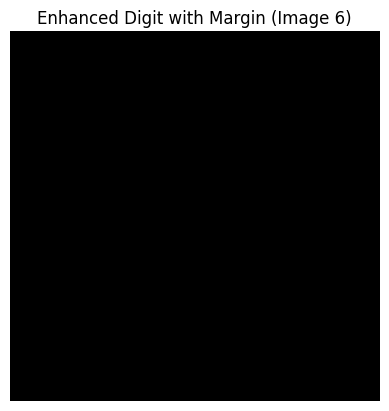

Processing complete. All enhanced images with margins have been saved.


In [27]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Input folder containing the segmented images
input_folder = 'SegmentedImage'
output_folder = 'Final'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Initialize a counter for naming the output images
image_counter = 1

# Define the margin size (in pixels)
margin_size = 20

# Iterate through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(input_folder, filename)

        # Load the image in grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Check if the image is loaded successfully
        if image is None:
            print(f"Error: Image not found or could not be loaded at path {image_path}")
            continue

        # Invert the image (black background, white digits)
        inverted_image = cv2.bitwise_not(image)

        # Apply thresholding to ensure the background is black
        _, thresholded_image = cv2.threshold(inverted_image, 200, 255, cv2.THRESH_BINARY)

        # Enhance contrast and brightness
        alpha = 1.5  # Increase contrast
        beta = 0     # No extra brightness change
        enhanced_image = cv2.convertScaleAbs(thresholded_image, alpha=alpha, beta=beta)

        # Apply dilation to make the text bolder
        kernel = np.ones((5, 5), np.uint8)
        dilated_image = cv2.dilate(enhanced_image, kernel, iterations=1)

        # Resize to 128x128 pixels
        resized_image = cv2.resize(dilated_image, (128, 128))

        # Add margins around the resized image
        image_with_margin = cv2.copyMakeBorder(
            resized_image, margin_size, margin_size, margin_size, margin_size, 
            cv2.BORDER_CONSTANT, value=0  # Black border (gap)
        )

        # Define the output image path with sequential naming
        output_filename = f"digit_{image_counter}.png"
        output_path = os.path.join(output_folder, output_filename)

        # Save the processed image with margins
        cv2.imwrite(output_path, image_with_margin)
        print(f"Enhanced image with margins saved at: {output_path}")

        # Increment the image counter
        image_counter += 1

        # Optional: Display the image (you can comment this out if not needed)
        plt.imshow(image_with_margin, cmap='gray')
        plt.title(f'Enhanced Digit with Margin (Image {image_counter - 1})')
        plt.axis('off')
        plt.show()

print("Processing complete. All enhanced images with margins have been saved.")
